# Random Signals

*This jupyter notebook is part of a [collection of notebooks](../index.ipynb) on various topics of Digital Signal Processing. Please direct questions and suggestions to [Sascha.Spors@uni-rostock.de](mailto:Sascha.Spors@uni-rostock.de).*

## Superposition of Random Signals

The superposition of two random signals 

\begin{equation}
y[k] = x[k] + n[k]
\end{equation}

is a frequently applied operation in statistical signal processing. For instance, to model a measurement procedure or communication channel as superposition of the desired signal with noise. We assume that the statistical properties of the real-valued signals $x[k]$ and $n[k]$ are known. We are interested in the statistical properties of $y[k]$, as well as the joint statistical properties between the signals and their superposition $y[k]$. It is assumed for the following that $x[k]$ and $n[k]$ are drawn from wide-sense stationary (WSS) real-valued random processes.

### Cumulative Distribution and Probability Density Function

The cumulative distribution function (CDF) $P_y(\theta)$ of $y[k]$ is given by rewriting it in terms of the joint probability density function (PDF) $p_{xn}(\theta_x, \theta_n)$

\begin{equation}
P_y(\theta) = \Pr \{ y[k] \leq \theta \} = \Pr \{ (x[k] + n[k]) \leq \theta \} =
\int\limits_{-\infty}^{\infty} \int\limits_{-\infty}^{\theta - \theta_n} p_{xn}(\theta_x, \theta_n) \; \mathrm{d}\theta_x\,\mathrm{d}\theta_n
\end{equation}

Its PDF is computed by introducing above result into the [definition](distributions.ipynb#Univariate-Probability-Density-Function) of the PDF

\begin{equation}
p_y(\theta) = \frac{\mathrm{d} P_y(\theta)}{\mathrm{d}\theta} = \int\limits_{-\infty}^{\infty} p_{xn}(\theta - \theta_n, \theta_n) \; \mathrm{d}\theta_n
\end{equation}

since the inner integral on the right hand side of $P_y(\theta)$ can be interpreted as the inverse operation to the derivation with respect to $\theta$.

An important special case is that $x[k]$ and $n[k]$ are uncorrelated. Under this assumption, the joint PDF $p_{xn}(\theta_x, \theta_n)$ can be written as $p_{xn}(\theta_x, \theta_n) = p_x(\theta_x) \cdot p_n(\theta_n)$. Introducing this into above result yields

\begin{align}
p_y(\theta) &= \int\limits_{-\infty}^{\infty} p_x(\theta - \theta_n) \cdot p_n(\theta_n) \; \mathrm{d}\theta_n \\
&= p_x(\theta) * p_n(\theta)
\end{align}

Hence, the PDF of the superposition of two uncorrelated signals is given by the convolution of the PDFs of both signals.

#### Example - PDF of a superposition of two uncorrelated signals

The following example estimates the PDF of a superposition of two uncorrelated signals drawn from random processes generating samples according to the [uniformly distributed](important_distributions.ipynb#Uniform-Distribution) white noise model with $a=0$ and $b=1$.

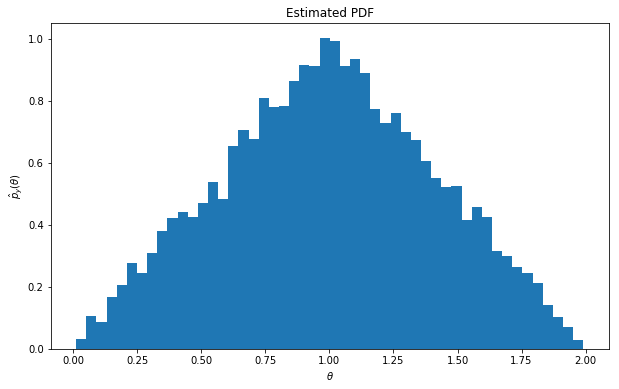

In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

N = 10000  # length of random signals

# generate random signals
np.random.seed(2)
x = np.random.uniform(size=N)
n = np.random.uniform(size=N)
y = x + n

# plot estimated pdf
plt.figure(figsize = (10, 6))
plt.hist(y, 50, normed=True)
plt.title('Estimated PDF')
plt.xlabel(r'$\theta$')
plt.ylabel(r'$\hat{p}_y(\theta)$');

**Exercise**

* Check the result of the numerical simulation by calculating the theoretical PDF of $y[k]$

Solution: The PDF of both signals $x[k]$ and $n[k]$ is given as $p_x(\theta) = p_n(\theta) = \text{rect}(\theta - \frac{1}{2})$, according to the assumptions stated above. The PDF of $y[k] = x[k] + n[k]$ is consequently given by $p_y(\theta) = \text{rect}(\theta - \frac{1}{2}) * \text{rect}(\theta - \frac{1}{2})$. The convolution of two rectangular signals results in a triangular signal. Hence

\begin{equation}
p_y(\theta) = 
\begin{cases}
1 - |\theta -1| & \text{for } 0 < \theta < 2 \\
0 & \text{otherwise}
\end{cases}
\end{equation}

### Linear Mean

The linear mean $\mu_y$ of the superposition is derived by introducing $y[k] = x[k] + n[k]$ into the [definition of the linear mean](ensemble_averages.ipynb#Linear-mean) and exploiting the [linearity of the expectation operator](ensemble_averages.ipynb#Properties) as

\begin{equation}
\mu_y[k] = E \{ x[k] + n[k] \} = \mu_x[k] + \mu_n[k]
\end{equation}

The linear mean of the superposition of two random signals is the superposition of its linear means.

### Auto-Correlation Function and Power Spectral Density

The ACF is computed in the same manner as the linear mean by inserting the superposition into the [definition](correlation_functions.ipynb#Auto-Correlation-Function) of the ACF and rearranging terms

\begin{align}
\varphi_{yy}[\kappa] &= E\{ y[k] \cdot y[k-\kappa] \} \\
&= E\{ (x[k] + n[k]) \cdot (x[k-\kappa] + n[k-\kappa]) \} \\
&= \varphi_{xx}[\kappa] + \varphi_{xn}[\kappa] + \varphi_{nx}[\kappa] + \varphi_{nn}[\kappa] 
\end{align}

The ACF of the superposition of two random signals is given as the superposition of all auto- and cross-correlation functions (CCFs) of the two random signals. The power spectral density (PSD) is derived by performing a discrete-time Fourier transform (DTFT) of the ACF

\begin{equation}
\Phi_{yy}(\mathrm{e}^{\,\mathrm{j}\,\Omega}) = \Phi_{xx}(\mathrm{e}^{\,\mathrm{j}\,\Omega}) + \Phi_{xn}(\mathrm{e}^{\,\mathrm{j}\,\Omega}) + \Phi_{nx}(\mathrm{e}^{\,\mathrm{j}\,\Omega}) + \Phi_{nn}(\mathrm{e}^{\,\mathrm{j}\,\Omega})
\end{equation}

This can be simplified further by exploiting the symmetry property of the CCFs $\varphi_{xn}[\kappa] = \varphi_{nx}[-\kappa]$ and the DTFT for real-valued signals as

\begin{equation}
\Phi_{yy}(\mathrm{e}^{\,\mathrm{j}\,\Omega}) = \Phi_{xx}(\mathrm{e}^{\,\mathrm{j}\,\Omega}) + 2\,\Re \{ \Phi_{xn}(\mathrm{e}^{\,\mathrm{j}\,\Omega}) \} + \Phi_{nn}(\mathrm{e}^{\,\mathrm{j}\,\Omega})
\end{equation}

where $\Re \{ \cdot \}$ denotes the real part of its argument.

### Cross-Correlation Function and Cross Power Spectral Density

The CCF $\varphi_{ny}[\kappa]$ between the random signal $n[k]$ and the superposition $y[k]$ is derived again by introducing the superposition into the [definition of the CCF](correlation_functions.ipynb#Cross-Correlation-Function)

\begin{equation}
\varphi_{ny}[\kappa] = E\{ n[k] \cdot (x[k-\kappa] + n[k-\kappa]) \} = \varphi_{nx}[\kappa] + \varphi_{nn}[\kappa]
\end{equation}

It is given as the superposition of the CCF between the two random signals and the ACF of $n[k]$. The cross PSD is derived by applying the DTFT to $\varphi_{ny}[\kappa]$

\begin{equation}
\Phi_{ny}(\mathrm{e}^{\,\mathrm{j}\,\Omega}) = \Phi_{nx}(\mathrm{e}^{\,\mathrm{j}\,\Omega}) + \Phi_{nn}(\mathrm{e}^{\,\mathrm{j}\,\Omega})
\end{equation}

The CCF $\varphi_{xy}[\kappa]$ and cross PSD $\Phi_{xy}(\mathrm{e}^{\,\mathrm{j}\,\Omega})$ can be derived by exchanging the signals $n[k]$ and $x[k]$

\begin{equation}
\varphi_{xy}[\kappa] = E\{ x[k] \cdot (x[k-\kappa] + n[k-\kappa]) \} = \varphi_{xx}[\kappa] + \varphi_{xn}[\kappa]
\end{equation}

and

\begin{equation}
\Phi_{xy}(\mathrm{e}^{\,\mathrm{j}\,\Omega}) = \Phi_{xx}(\mathrm{e}^{\,\mathrm{j}\,\Omega}) + \Phi_{xn}(\mathrm{e}^{\,\mathrm{j}\,\Omega})
\end{equation}

### Additive White Gaussian Noise

In order to model the effect of distortions, it is often assumed that a random signal $x[k]$ is distorted by additive normal distributed white noise $n[k]$ resulting in the observed signal $y[k] = x[k] + n[k]$. It is furthermore assumed that the noise $n[k]$ is uncorrelated to the signal $x[k]$. This model is known as [additive white Gaussian noise](https://en.wikipedia.org/wiki/Additive_white_Gaussian_noise) (AWGN) model. 

For zero-mean random processes and from the properties of the AWGN model, it follows that $\varphi_{xn}[\kappa] = \varphi_{nx}[\kappa] = 0$ and $\varphi_{nn}[\kappa] = N_0 \cdot \delta[\kappa]$. Introducing this into above results for additive random signals yields the following relations for the AWGN model

\begin{align}
\varphi_{yy}[\kappa] &= \varphi_{xx}[\kappa] + N_0 \cdot \delta[\kappa] \\
\varphi_{ny}[\kappa] &= N_0 \cdot \delta[\kappa] \\
\varphi_{xy}[\kappa] &= \varphi_{xx}[\kappa]
\end{align}

The PSDs are given as the DTFTs of the ACF/CCFs. The AWGN model is frequently assumed in communications as well as in the measurement of physical quantities to cope for background, sensor and amplifier noise.

### Example - Estimating the Period of a Noisy Periodic Signal

For the following numerical example, the disturbance of a harmonic signal $x[k] = \cos(\Omega_0 k)$ by unit variance AWGN $n[k]$ is considered. The observed signal is given as

\begin{equation}
y[k] = x[k] + n[k]
\end{equation}

The ACF $\varphi_{yy}[\kappa]$ of the compound signal, as well as the CCF between noise and signal $\varphi_{ny}[\kappa]$ is computed and plotted.

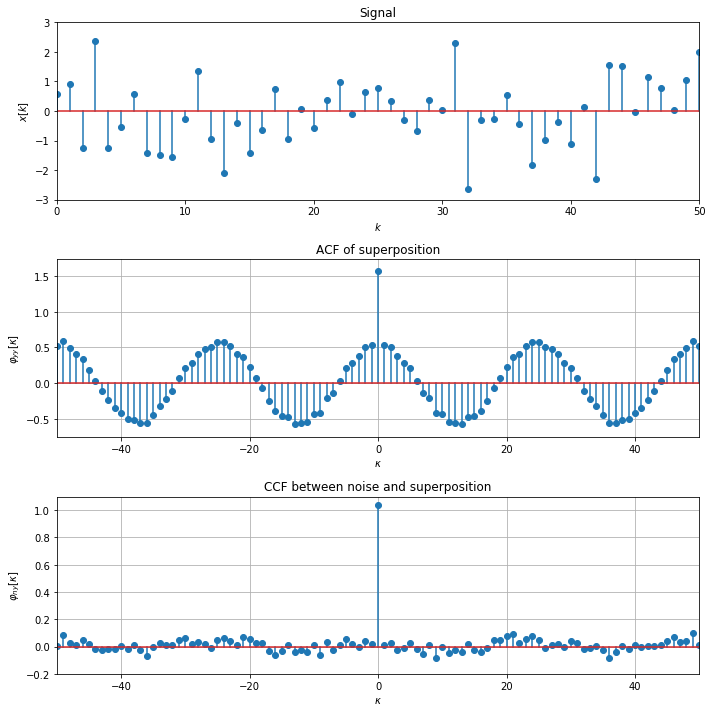

In [2]:
N = 1024  # length of compound signals
M = 25  # period of cosine signal
K = 2*M  # maximum lag for ACF/CCF

# generate signals
x = np.cos(2*np.pi/M * np.arange(N))
np.random.seed(2)
n = np.random.normal(size=N)
# superposition of signals
y = x + n

# compute and truncate ACF of superposition
acf = 1/N * np.correlate(y, y, mode='full')
acf = acf[(len(y)-1)-K:len(y)+K]
# compute and truncate CCF of superposition and noise
ccf = 1/N * np.correlate(n, y, mode='full')
ccf = ccf[(len(y)-1)-K:len(y)+K]


# plot results
kappa = np.arange(-K, K+1)

plt.figure(figsize=(10, 10))

plt.subplot(311)
plt.stem(y)
plt.title('Signal')
plt.xlabel(r'$k$')
plt.ylabel(r'$x[k]$')
plt.axis([0, K, -3, 3])

plt.subplot(312)
plt.stem(kappa, acf)
plt.title('ACF of superposition')
plt.xlabel(r'$\kappa$')
plt.ylabel(r'$\varphi_{yy}[\kappa]$')
plt.axis([-K, K, -.75, 1.1*np.max(acf)])
plt.grid()

plt.subplot(313)
plt.stem(kappa, ccf)
plt.title('CCF between noise and superposition')
plt.xlabel(r'$\kappa$')
plt.ylabel(r'$\varphi_{ny}[\kappa]$')
plt.axis([-K, K, -.2, 1.1])
plt.grid()

plt.tight_layout()

**Exercise**

* Derive the theoretic result for the ACF $\varphi_{xx}[\kappa]$
* Based on this, can you explain the shape of the ACF?
* Estimate the periodicity/frequency of the cosine signal from the ACF
* What conclusions can you draw from the CCF between noise and signal?

Solution: The ACF of the deterministic signal $x[k] = \cos(\Omega_0 k)$ is computed via temporal averaging. Since $x[k]$ is periodic, the ACF $\varphi_{xx}[\kappa]$ is also periodic. It is hence sufficient to perform the temporal averaging over one period $N = \frac{2 \pi}{\Omega_0}$ with $N \in \mathbb{Z}$

\begin{align}
\varphi_{xx}[\kappa] &= \frac{1}{N} \sum_{k=0}^{N-1} x[k] \cdot x[k-\kappa] \\
&= \frac{1}{N} \sum_{k=0}^{N-1} \cos(\Omega_0 k) \cdot \cos(\Omega_0 (k-\kappa))
\end{align}

Applying the [product-to-sum identity](https://en.wikipedia.org/wiki/List_of_trigonometric_identities#Product-to-sum_and_sum-to-product_identities) of the cosine function and rearranging terms yields

\begin{equation}
\varphi_{xx}[\kappa] = \frac{1}{2} \cos(\Omega_0 \kappa) + \frac{1}{2N} \sum_{k=0}^{N-1} \cos(2 \Omega_0 k - \Omega_0 \kappa)
\end{equation}

The remaining sum over the phase shifted cosine $\cos(2 \Omega_0 k - \Omega_0 \kappa)$ is zero since the summation is carried out over two full periods. The ACF of a cosine signal is then given as

\begin{equation}
\varphi_{xx}[\kappa] = \frac{1}{2} \cos(\Omega_0 \kappa)
\end{equation}

Introducing this into the relations for the AWGN model, the ACF of the superposition is

\begin{equation}
\varphi_{yy}[\kappa] = \varphi_{xx}[\kappa] + N_0 \delta[\kappa]  = \frac{1}{2} \cos(\Omega_0 \kappa) + N_0 \delta[\kappa]
\end{equation}

Taking the statistical uncertainty due to a finite number of samples into account, this analytic result coincides well with the ACF of the numerical evaluation shown above.

The ACF of a periodic signal is also periodic. The ACF $\varphi_{yy}[\kappa]$ is composed from a superposition of the ACF $\varphi_{xx}[\kappa]$ of the periodic cosine signal and an aperiodic contribution from the additive noise. Hence, the period of the cosine can be estimated from the period of the ACF.

It can be concluded from the CCF that the additive noise is not correlated with the cosine signal.

### Example - Denoising by Repeated Averaging

Let's assume that we can have access to multiple observations of a noisy deterministic signal $x[k]$. The $i$-th observation $y_i[k]$ is then given by the following AWGN model

\begin{equation}
y_i[k] = x[k] + n_i[k]
\end{equation}

where $n_i[k]$ denotes the $i$-th sample function of a zero-mean white noise process with PSD $N_0$. It is assumed that the sample functions of the noise process are mutually independent. An estimate $\hat{x}[k]$ of the deterministic signal $x[k]$ is given by averaging over $N$ observations

\begin{equation}
\hat{x}[k] = \frac{1}{N} \sum_{i=0}^{N-1} (x[k] + n_i[k]) = x[k] + \underbrace{\frac{1}{N} \sum_{i=0}^{N-1} n_i[k]}_{n[k]}
\end{equation}

The estimate consists of a superposition of the true signal $x[k]$ and noise $n[k]$.

The [signal-to-noise ratio](https://en.wikipedia.org/wiki/Signal-to-noise_ratio) (SNR) of the estimate is defined as the power of the true signal $x[k]$ divided by the power of the additive noise. Following this definition, the average SNR is given as

\begin{equation}
\mathrm{SNR} = 10 \cdot \log_{10} \left( \frac{P_x}{\sigma_n^2} \right) \quad \text{ in dB}
\end{equation}

where $P_x$ denotes the average power of the signal $x[k]$ and $\sigma_n^2$ the variance of the noise $n[k]$. The SNR of the estimate $\hat{x}[k]$ is computed in the following to quantify the gain in SNR achieved by averaging. The average power $P_x$ of the signal is assumed to be known, the power of the noise $\sigma_x^2$ can be computed from its ACF. Repeated application of above findings for the AWGN model yields

\begin{equation}
\sigma_n^2 = \frac{1}{N^2} \, ( N \cdot N_0 ) = \frac{N_0}{N}
\end{equation}

since the scaling $\frac{1}{N}$ in above sum results in a $\frac{1}{N^2}$ scaling of the variance and $N$ uncorrelated instances of $n_i[k]$ with power $N_0$ are summed up. The SNR of the estimate follows then as

\begin{equation}
\mathrm{SNR} = 10 \cdot \log_{10} \left( P_x \right) - 10 \cdot \log_{10} \left( N_0 \right) + 10 \cdot \log_{10} \left( N \right) \quad \text{ in dB}
\end{equation}

By averaging over $N$ observations, an average gain of $10 \cdot \log_{10} \left( N \right)$ dB in terms of SNR can be achieved.

The following numerical example illustrates the denoising of a cosine signal superimposed by unit variance white Gaussian noise. One particular observation $y_i[k]$, the estimate $\hat{x}[k]$ by averaging over $N$ observations and the resulting SNR is shown.

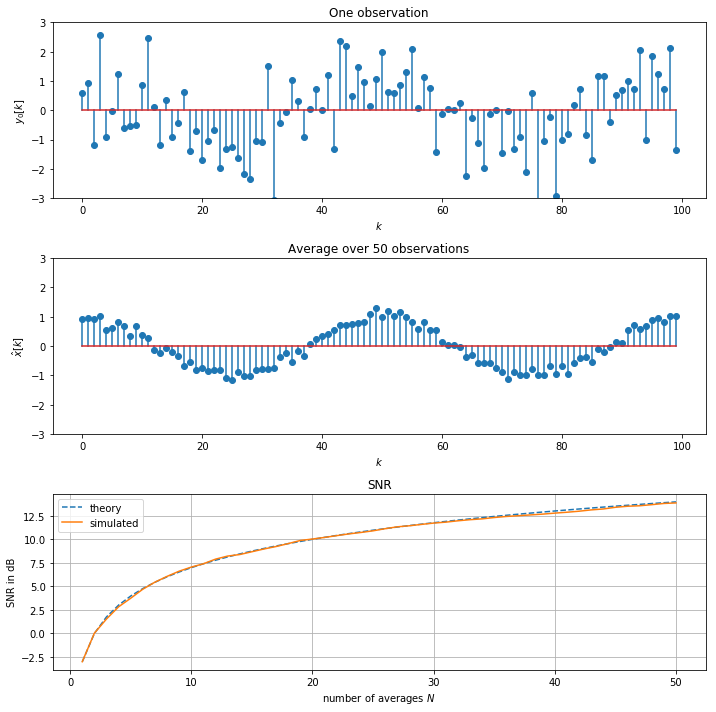

In [3]:
K = 1024  # number of samples
Nmax = 50  # number of observations

# generate signals
x = np.cos(2*np.pi/50 * np.arange(N))
np.random.seed(2)
n = np.random.normal(size=(Nmax, K))
# AWGN model
y = np.tile(x, (Nmax,1)) + n
# repeated averaging up to Nmax
xhat = np.zeros_like(y)
for i in range(Nmax):
    xhat[i, :] = 1/(i+1) * np.sum(y[:i+1, :], axis=0)
# compute SNR for all averages
Px = np.var(x)
Pn = np.var(xhat - x, axis=1)
SNR = 10*np.log10(Px/Pn)

# plot results
plt.figure(figsize=(10, 10))

plt.subplot(311)
plt.stem(y[0, :100])
plt.title('One observation')
plt.xlabel(r'$k$')
plt.ylabel(r'$y_0[k]$')
plt.ylim([-3, 3])

plt.subplot(312)
plt.stem(xhat[Nmax-1, :100])
plt.title('Average over {:2.0f} observations'.format(Nmax))
plt.xlabel(r'$k$')
plt.ylabel(r'$\hat{x}[k]$')
plt.ylim([-3, 3])

plt.subplot(313)
plt.plot(range(1, Nmax+1), 10*np.log10(Px * range(1, Nmax+1)), '--', label='theory')
plt.plot(range(1, Nmax+1), SNR, label='simulated')
plt.title('SNR')
plt.xlabel('number of averages $N$')
plt.ylabel('SNR in dB')
plt.grid()
plt.legend()

plt.tight_layout()

**Excercise**

* How does the SNR change if the instances $n_i[k]$ of the additive noise are mutually correlated?

Solution: The gain in terms of SNR will be lower since the mutually correlated AWGNs do not average out in the estimate $\hat{x}[k]$. For instance, the averaging will have no effect if the samples of the additive noise are equal for all observed signals $y_i[k] = x[k] + n_0[k]$.

**Copyright**

This notebook is provided as [Open Educational Resource](https://en.wikipedia.org/wiki/Open_educational_resources). Feel free to use the notebook for your own purposes. The text is licensed under [Creative Commons Attribution 4.0](https://creativecommons.org/licenses/by/4.0/), the code of the IPython examples under the [MIT license](https://opensource.org/licenses/MIT). Please attribute the work as follows: *Sascha Spors, Digital Signal Processing - Lecture notes featuring computational examples, 2016-2018*.